# Rahul.S

# TASK - 2 BEGINNER LEVEL 
# Stock Market Prediction And Forecasting Using Stacked LSTM

1. LOADING THE DATA SET

In [83]:
import pandas as pd
df = pd.read_csv('stock market prediction.csv')


In [84]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [85]:
df1 = df.reset_index() ['Close']

In [86]:
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

# plotting close values in a graph

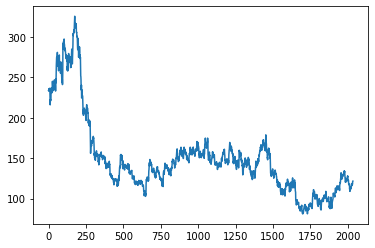

In [87]:
import matplotlib.pyplot as plt
plt.plot(df1)

# applying minmax scalar

In [88]:
import numpy as np
import sklearn

In [89]:
from sklearn.preprocessing import MinMaxScaler 

In [90]:
scaler=MinMaxScaler(feature_range=(0,1))

In [91]:
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [92]:
df1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

# training and testing the dataset

In [93]:
train_size = int(len(df1)*0.6)
test_size = len(df1) - train_size 
train_data,test_data = df1[0:train_size,:],df1[train_size:len(df1),:1]

In [94]:
train_data,train_size

(array([[0.62418301],
        [0.62214052],
        [0.62622549],
        ...,
        [0.34517974],
        [0.31781046],
        [0.33047386]]),
 1221)

In [95]:
test_data,test_size

(array([[0.32128268],
        [0.34007353],
        [0.3310866 ],
        [0.31495098],
        [0.32066993],
        [0.32312092],
        [0.32352941],
        [0.30473856],
        [0.3057598 ],
        [0.30739379],
        [0.2943219 ],
        [0.30330882],
        [0.28125   ],
        [0.25694444],
        [0.26654412],
        [0.26552288],
        [0.26531863],
        [0.25408497],
        [0.26123366],
        [0.27798203],
        [0.28431373],
        [0.27246732],
        [0.27410131],
        [0.28227124],
        [0.29084967],
        [0.28513072],
        [0.28492647],
        [0.26838235],
        [0.26981209],
        [0.27062908],
        [0.25694444],
        [0.24754902],
        [0.2567402 ],
        [0.23713235],
        [0.23284314],
        [0.2250817 ],
        [0.24652778],
        [0.25776144],
        [0.26879085],
        [0.26674837],
        [0.24897876],
        [0.24489379],
        [0.24795752],
        [0.24305556],
        [0.27246732],
        [0

In [96]:

# conversion of training data and test data into a matrix
def create_dataset(dataset,time_step):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX) , np.array(dataY)

time_step = 100
X_train , y_train = create_dataset(train_data,time_step)
X_test , y_test = create_dataset(test_data,time_step)


In [97]:
X_test.shape

(713, 100)

In [98]:
X_train.shape

(1120, 100)

In [99]:
y_train.shape


(1120,)

In [68]:
y_test.shape

(713,)

# building a model

In [69]:
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [70]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [71]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


TRAINING THE DATA AND PREDICTING THE OUTPUT

In [43]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, batch_size=64)

Epoch 1/40
18/18 [==============================] - 6s 323ms/step - loss: 7.4047e-04 - val_loss: 5.6844e-04
Epoch 2/40
18/18 [==============================] - 6s 318ms/step - loss: 6.0084e-04 - val_loss: 4.7367e-04
Epoch 3/40
18/18 [==============================] - 5s 298ms/step - loss: 4.8688e-04 - val_loss: 3.9943e-04
Epoch 4/40
18/18 [==============================] - 5s 306ms/step - loss: 4.8903e-04 - val_loss: 4.2475e-04
Epoch 5/40
18/18 [==============================] - 6s 313ms/step - loss: 5.2269e-04 - val_loss: 5.1235e-04
Epoch 6/40
18/18 [==============================] - 5s 308ms/step - loss: 5.0333e-04 - val_loss: 4.2360e-04
Epoch 7/40
18/18 [==============================] - 6s 319ms/step - loss: 5.5038e-04 - val_loss: 5.3342e-04
Epoch 8/40
18/18 [==============================] - 6s 316ms/step - loss: 4.9681e-04 - val_loss: 4.4138e-04
Epoch 9/40
18/18 [==============================] - 5s 303ms/step - loss: 4.4239e-04 - val_loss: 3.5873e-04
Epoch 10/40
18/18 [=========

In [27]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

23/23 [==============================] - 4s 58ms/step


In [28]:
trans = model.predict(X_test[-1::]) 
output = scaler.inverse_transform(trans)
output

1/1 [==============================] - 0s 58ms/step


array([[118.20988]], dtype=float32)

In [29]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [30]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

165.66255486569645

In [31]:
math.sqrt(mean_squared_error(y_test, test_predict))

119.49878327999953

# Data visualization

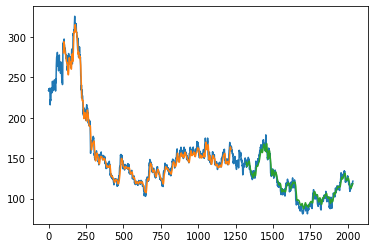

In [72]:
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back] = train_predict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [73]:
len(test_data)

814

In [74]:
x_input=test_data[714:].reshape(1,-1)
x_input.shape

(1, 100)

In [75]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.12479575163398693,
 0.1384803921568627,
 0.14011437908496732,
 0.1388888888888889,
 0.13541666666666663,
 0.14011437908496732,
 0.13807189542483655,
 0.130718954248366,
 0.130718954248366,
 0.12867647058823528,
 0.11846405228758167,
 0.14644607843137253,
 0.1480800653594771,
 0.159109477124183,
 0.15992647058823523,
 0.1578839869281045,
 0.16441993464052285,
 0.178921568627451,
 0.17933006535947704,
 0.19260620915032678,
 0.2081290849673203,
 0.18974673202614378,
 0.18055555555555558,
 0.1823937908496731,
 0.17708333333333326,
 0.17810457516339862,
 0.18055555555555558,
 0.17810457516339862,
 0.17851307189542487,
 0.196078431372549,
 0.18913398692810457,
 0.1895424836601307,
 0.19403594771241828,
 0.19444444444444442,
 0.20200163398692816,
 0.19771241830065356,
 0.19934640522875813,
 0.19873366013071891,
 0.19975490196078427,
 0.21282679738562094,
 0.21568627450980393,
 0.2044526143790849,
 0.21772875816993464,
 0.21098856209150318,
 0.21425653594771243,
 0.1975081699346406,
 0.1881

In [76]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[-0.0006618]
101
1 day input [ 0.13848039  0.14011438  0.13888889  0.13541667  0.14011438  0.1380719
  0.13071895  0.13071895  0.12867647  0.11846405  0.14644608  0.14808007
  0.15910948  0.15992647  0.15788399  0.16441993  0.17892157  0.17933007
  0.19260621  0.20812908  0.18974673  0.18055556  0.18239379  0.17708333
  0.17810458  0.18055556  0.17810458  0.17851307  0.19607843  0.18913399
  0.18954248  0.19403595  0.19444444  0.20200163  0.19771242  0.19934641
  0.19873366  0.1997549   0.2128268   0.21568627  0.20445261  0.21772876
  0.21098856  0.21425654  0.19750817  0.18811275  0.17851307  0.17381536
  0.16033497  0.16564542  0.17116013  0.17422386  0.18035131  0.17401961
  0.16278595  0.16973039  0.17810458  0.17034314  0.16830065  0.17279412
  0.17544935  0.18382353  0.19138072  0.18913399  0.19097222  0.17238562
  0.16830065  0.1693219   0.17177288  0.16156046  0.14971405  0.1503268
  0.15196078  0.14726307  0.14501634  0.14603758  0.12479575  0.13112745
  0.11397059  0.1190768 

9 day output [[-0.00126188]]
10 day input [ 0.11846405  0.14644608  0.14808007  0.15910948  0.15992647  0.15788399
  0.16441993  0.17892157  0.17933007  0.19260621  0.20812908  0.18974673
  0.18055556  0.18239379  0.17708333  0.17810458  0.18055556  0.17810458
  0.17851307  0.19607843  0.18913399  0.18954248  0.19403595  0.19444444
  0.20200163  0.19771242  0.19934641  0.19873366  0.1997549   0.2128268
  0.21568627  0.20445261  0.21772876  0.21098856  0.21425654  0.19750817
  0.18811275  0.17851307  0.17381536  0.16033497  0.16564542  0.17116013
  0.17422386  0.18035131  0.17401961  0.16278595  0.16973039  0.17810458
  0.17034314  0.16830065  0.17279412  0.17544935  0.18382353  0.19138072
  0.18913399  0.19097222  0.17238562  0.16830065  0.1693219   0.17177288
  0.16156046  0.14971405  0.1503268   0.15196078  0.14726307  0.14501634
  0.14603758  0.12479575  0.13112745  0.11397059  0.1190768   0.12377451
  0.13562092  0.12908497  0.13459967  0.12806373  0.13031046  0.12724673
  0.135212

17 day output [[-0.00111847]]
18 day input [ 0.17933007  0.19260621  0.20812908  0.18974673  0.18055556  0.18239379
  0.17708333  0.17810458  0.18055556  0.17810458  0.17851307  0.19607843
  0.18913399  0.18954248  0.19403595  0.19444444  0.20200163  0.19771242
  0.19934641  0.19873366  0.1997549   0.2128268   0.21568627  0.20445261
  0.21772876  0.21098856  0.21425654  0.19750817  0.18811275  0.17851307
  0.17381536  0.16033497  0.16564542  0.17116013  0.17422386  0.18035131
  0.17401961  0.16278595  0.16973039  0.17810458  0.17034314  0.16830065
  0.17279412  0.17544935  0.18382353  0.19138072  0.18913399  0.19097222
  0.17238562  0.16830065  0.1693219   0.17177288  0.16156046  0.14971405
  0.1503268   0.15196078  0.14726307  0.14501634  0.14603758  0.12479575
  0.13112745  0.11397059  0.1190768   0.12377451  0.13562092  0.12908497
  0.13459967  0.12806373  0.13031046  0.12724673  0.13521242  0.14522059
  0.15257353  0.14848856  0.14338235  0.14562908  0.15236928  0.15400327
  0.1497

24 day output [[-0.00063197]]
25 day input [ 0.17810458  0.18055556  0.17810458  0.17851307  0.19607843  0.18913399
  0.18954248  0.19403595  0.19444444  0.20200163  0.19771242  0.19934641
  0.19873366  0.1997549   0.2128268   0.21568627  0.20445261  0.21772876
  0.21098856  0.21425654  0.19750817  0.18811275  0.17851307  0.17381536
  0.16033497  0.16564542  0.17116013  0.17422386  0.18035131  0.17401961
  0.16278595  0.16973039  0.17810458  0.17034314  0.16830065  0.17279412
  0.17544935  0.18382353  0.19138072  0.18913399  0.19097222  0.17238562
  0.16830065  0.1693219   0.17177288  0.16156046  0.14971405  0.1503268
  0.15196078  0.14726307  0.14501634  0.14603758  0.12479575  0.13112745
  0.11397059  0.1190768   0.12377451  0.13562092  0.12908497  0.13459967
  0.12806373  0.13031046  0.12724673  0.13521242  0.14522059  0.15257353
  0.14848856  0.14338235  0.14562908  0.15236928  0.15400327  0.14971405
  0.1621732   0.16319444  0.16584967 -0.0006618  -0.00067974 -0.00073757
 -0.00081

In [77]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [78]:
import matplotlib.pyplot as plt
len(df1)

2035

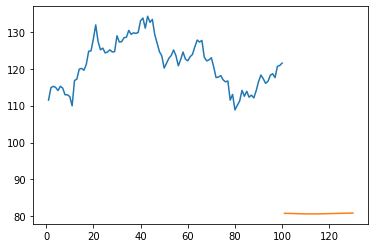

In [79]:
plt.plot(day_new,scaler.inverse_transform(df1[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

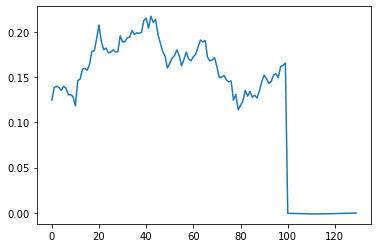

In [80]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1935:])

In [81]:
df3=scaler.inverse_transform(df3).tolist()

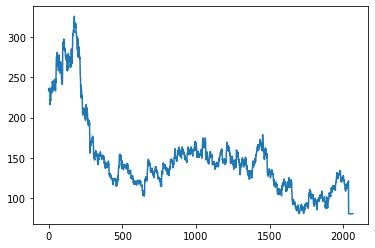

In [82]:
plt.plot(df3)